In [164]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [310]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0027_019_02.png',cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0106_010_03.png',cv2.IMREAD_GRAYSCALE)

In [311]:
img.shape

(256, 4096)

In [312]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 32
    ksize = 16  # The local area to evaluate
    sigma = 2. #3.0  # Larger Values produce more edges
    lambd = 20. #10.0
    gamma = 2. #0.5
    psi = 0.  # Offset value - lower generates cleaner results
    for theta in np.linspace(0, np.pi, num_filters, endpoint=False):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters

In [313]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

In [314]:
gfilters = create_gaborfilter()
image_g = apply_filter(img, gfilters)

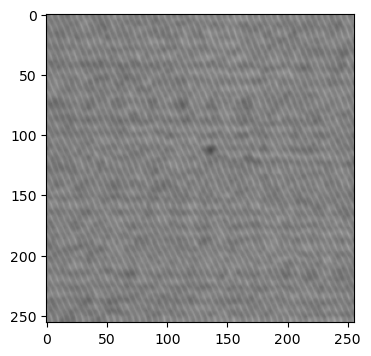

In [315]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(image_g[:,2000-256:2000], cmap="gray",vmin=0, vmax=255)
plt.show()

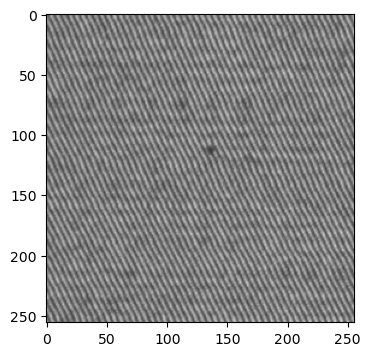

In [316]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(img[:,2000-256:2000], cmap="gray",vmin=0, vmax=255)
plt.show()

In [317]:
min_interval = 120
max_interval = 180
image_edge_g = cv2.Canny(image_g,threshold1 = min_interval,threshold2 = max_interval)#,apertureSize = 5)

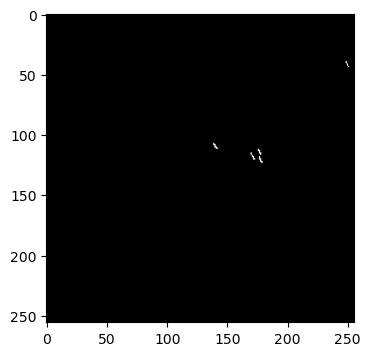

In [318]:
plt.figure(figsize=(4, 4))
plt.imshow(image_edge_g[:,2000-256:2000], cmap="gray")
plt.show()

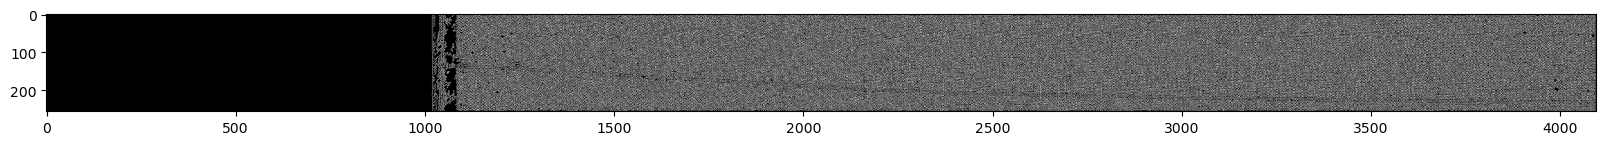

In [278]:
plt.figure(figsize=(20, 8))
plt.imshow(image_edge_g, cmap="gray")
plt.show()

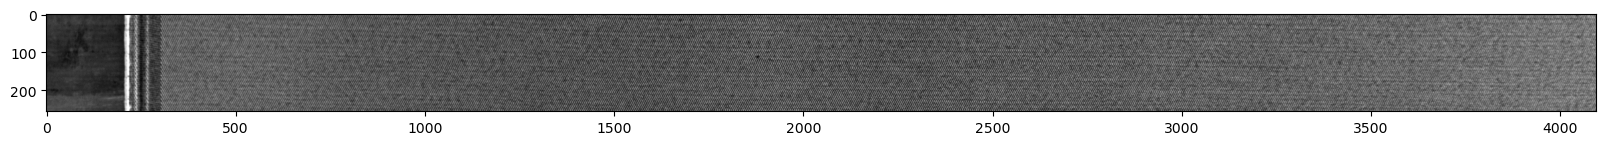

In [227]:
plt.figure(figsize=(20, 8))
plt.imshow(img, cmap="gray")
plt.show()

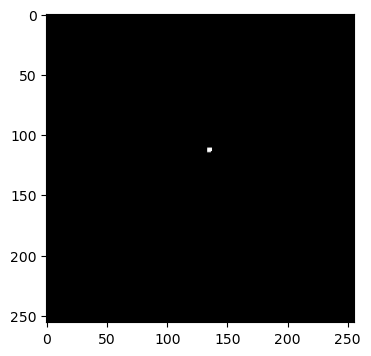

In [319]:
maksimg = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0027_019_02_mask.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(maksimg[:,2000-256:2000], cmap="gray")
plt.show()

In [174]:
np.amax(maksimg)

0

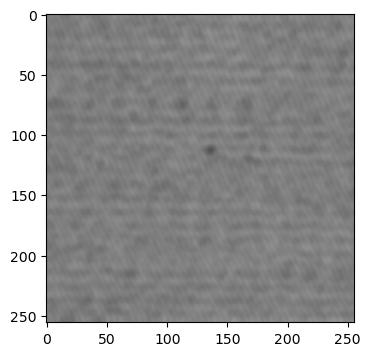

In [144]:
# img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Defect_images/0069_023_02.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(image_g[:,2000-256:2000], cmap="gray",vmin=0, vmax=255)
plt.show()

In [320]:
def sliding_window(image, sq_size = 32, pix_steps=4):
    img_list = []
    for i in np.arange(0,image.shape[0]-sq_size+pix_steps,pix_steps):
        for j in np.arange(0,image.shape[1]-sq_size+pix_steps,pix_steps):
            img_list.append(image[i:i+sq_size,j:j+sq_size].flatten())
    return np.array(img_list)

In [321]:
img_list = sliding_window(image_g)
print(img_list.shape)
norm_img_list = img_list -np.sum(img_list,axis=0)
norm_img_list = norm_img_list/np.sqrt(np.mean(norm_img_list**2))
# norm_img_list = norm_img_list.reshape(960,256**2)
print(norm_img_list.shape)


(57969, 32, 32)


In [106]:
pca = PCA(n_components=10)
pca.fit(norm_img_list)
comp = pca.components_

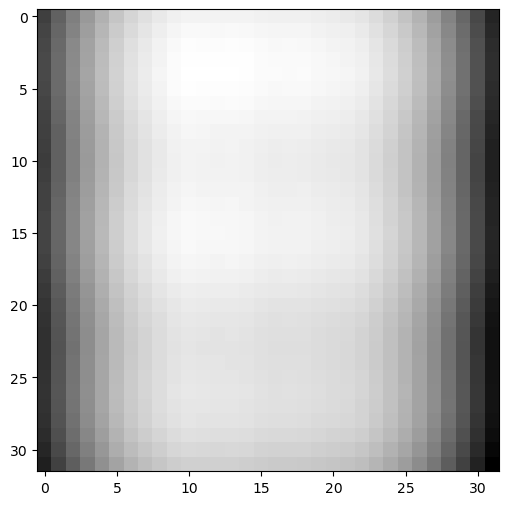

In [107]:
plt.figure(figsize=(6,6))
plt.imshow(comp[0,:].reshape(32,32),cmap="gray")
plt.show()

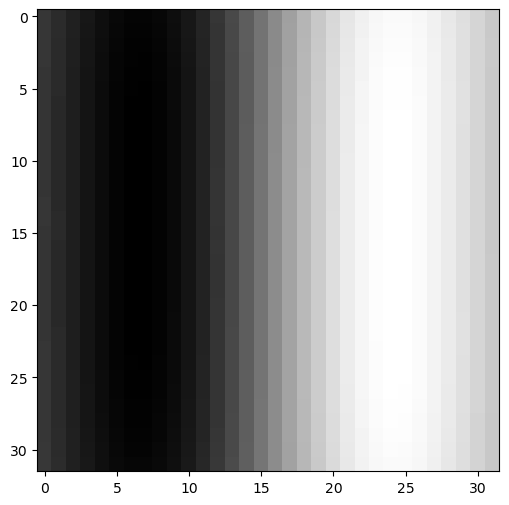

In [108]:
plt.figure(figsize=(6,6))
plt.imshow(comp[1,:].reshape(32,32),cmap="gray")
plt.show()

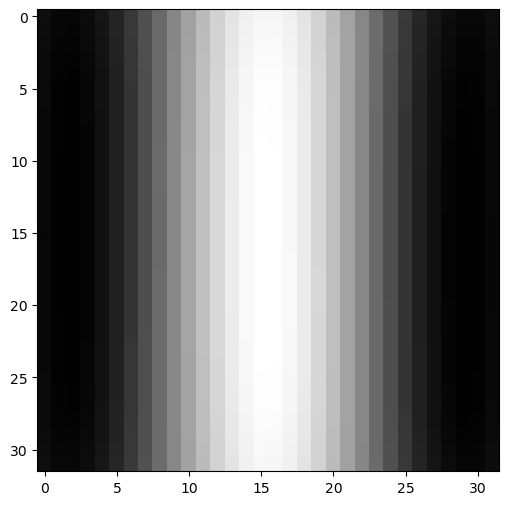

In [109]:
plt.figure(figsize=(6,6))
plt.imshow(comp[2,:].reshape(32,32),cmap="gray")
plt.show()

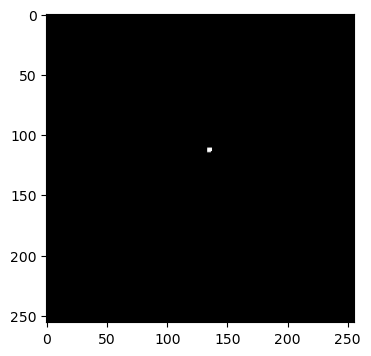

In [154]:
plt.figure(figsize=(4,4))
plt.imshow(maksimg[:,2000-256:2000], cmap="gray")
plt.show()

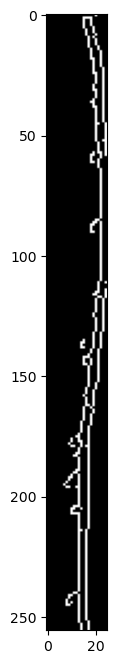

In [40]:
img = cv2.imread('C:/Users/laure/Documents/proj_loopr/archive/Mask_images/0069_023_02_mask.png',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8, 8))
min_interval = 500
max_interval = 560
image_edge_g = cv2.Canny(img,threshold1 = min_interval,threshold2 = max_interval,apertureSize = 5)
plt.imshow(image_edge_g[:,3675:3700], cmap="gray")
plt.show()